#### 2019 Kaggle ML & DS Survey
##### https://www.kaggle.com/c/kaggle-survey-2019

###### - Kaggle에서 진행한 데이터 과학 및 머신러닝 관련 설문조사 결과 데이터 
###### - 2019년 10/8~10/28 3주간 진행되었으며, 171개국으로부터 총 19,717개의 응답 수집
###### - 아래와 같이 총 4개의 데이터셋을 제공함 
###### -- 1) multiple_choice_responses.csv (20.33 MB) : 객관식 응답결과
###### -- 2) other_text_responses.csv (861.78 KB) : 주관식 응답결과 
###### -- 3) questions_only.csv (3.54 KB) : 설문문항 only
###### -- 4) survey_schema.csv (5.67 KB) : schema(설문문항 및 보기)  

In [1]:
## 기본 패키지 불러오기 
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
%matplotlib inline 
sns.set(style='darkgrid')
## 경고메시지 출력하지 않도록 설정 
import warnings
warnings.filterwarnings("ignore")

In [2]:
## 데이터 로딩 (텍스트 마이닝이 필요한 주관식 문항은 제외, 객관식 응답만 가져왔음)
df = pd.read_csv('data/data_2019/multiple_choice_responses.csv')
print(df.shape)

(19718, 246)


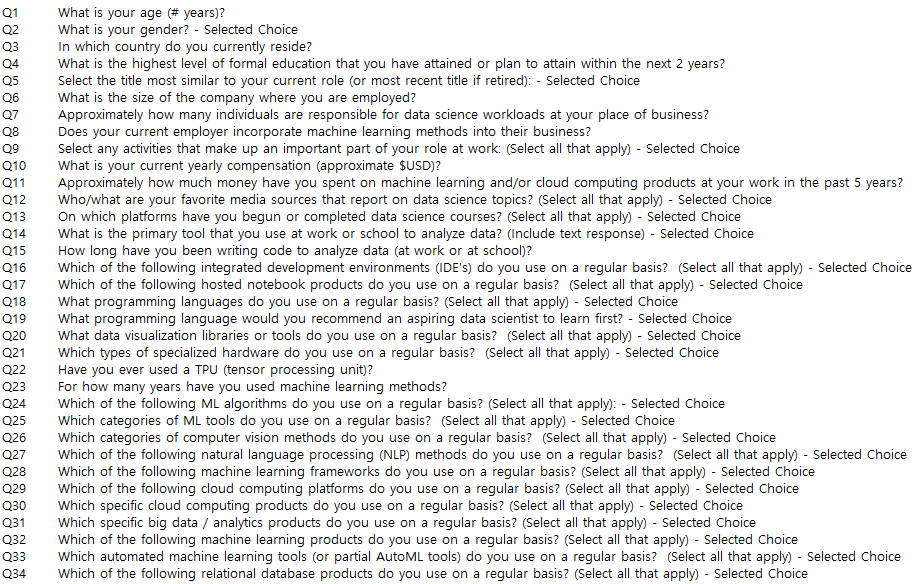

In [3]:
## 다음의 34개 문항으로 설문이 진행되었음 
from IPython.display import Image
Image("img/questions.PNG")

In [4]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [5]:
## 첫번째 행은 불필요하므로 제거하자 
df = df.drop(0, axis= 0)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


count     19716.000000
mean      14341.982552
std       74167.922114
min          23.000000
25%         340.000000
50%         540.000000
75%         930.000000
max      843612.000000
Name: Time from Start to Finish (seconds), dtype: float64


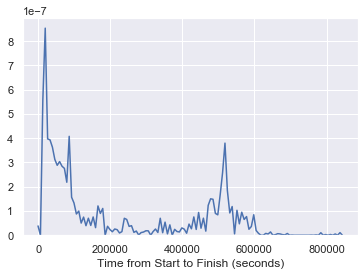

In [6]:
# Q. 전반적으로 설문 응답시간은 얼마나 걸렸는가? 
times = df.iloc[1:,0].reset_index(drop=True)
times = times.astype(int)
#### iloc[가져올 행범위 , 컬럼인덱스] => 0번째 컬럼에 대해, index=1번부터 끝까지 가져와서 times에 넣었다. 

print(times.describe())
sns.distplot(times, hist=False)

The average time(min) is = 10.577643258426967
The median time(min) is = 8.3


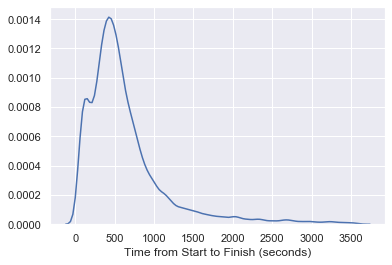

In [7]:
## 응답시간에 outlier가 너무 많아, 1시간(3600초) 이하로 제한하였다. 
times2 = times[times < 3600] 
print('The average time(min) is =', np.mean(times2)/60)
print('The median time(min) is =', np.median(times2)/60)
sns.distplot(times2, hist=False)

##### --> 대략 8~10분 정도가 응답에 소요된 시간이었던 것으로 나타남 

[Text(0.5, 1.0, 'Age')]

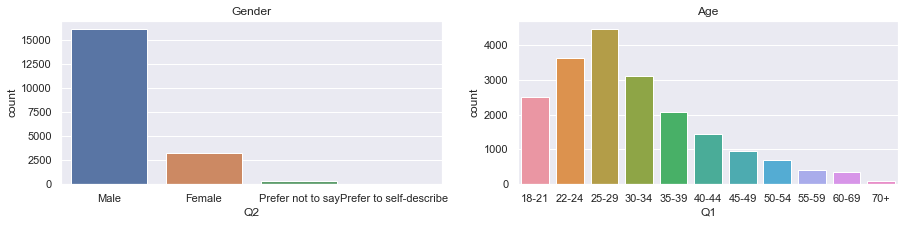

In [14]:
## Q1~Q3. 응답자의 성별, 연령별, 국가별 분포 확인
df = df.sort_values(by=['Q1'], axis=0) 
### 우선 연령대 순으로 보기좋게 정렬 한 후 
figure,(ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,3)

sns.countplot(data=df, x='Q2', ax=ax1)
sns.countplot(data=df, x='Q1', ax=ax2)
ax1.set(title = 'Gender')
ax2.set(title = 'Age')

##### --> 남성 비율이 매우 높음, 연령대는 주로 20대~30대 초반이다. 

[Text(0.5, 1.0, 'Female')]

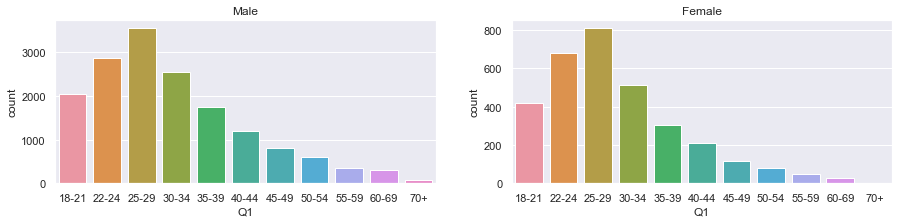

In [15]:
## 남여의 연령대별 분포를 비교해 보자 
df_male = df[df['Q2']=='Male']
df_female = df[df['Q2']=='Female']

figure,(ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,3)

sns.countplot(data=df_male, x='Q1', ax=ax1)
sns.countplot(data=df_female, x='Q1', ax=ax2)
ax1.set(title = 'Male')
ax2.set(title = 'Female')

##### --> 응답자의 연령대 구성은 남녀 모두 유사함 (20대~30대 초반 위주)

count     19717
unique       59
top       India
freq       4786
Name: Q3, dtype: object


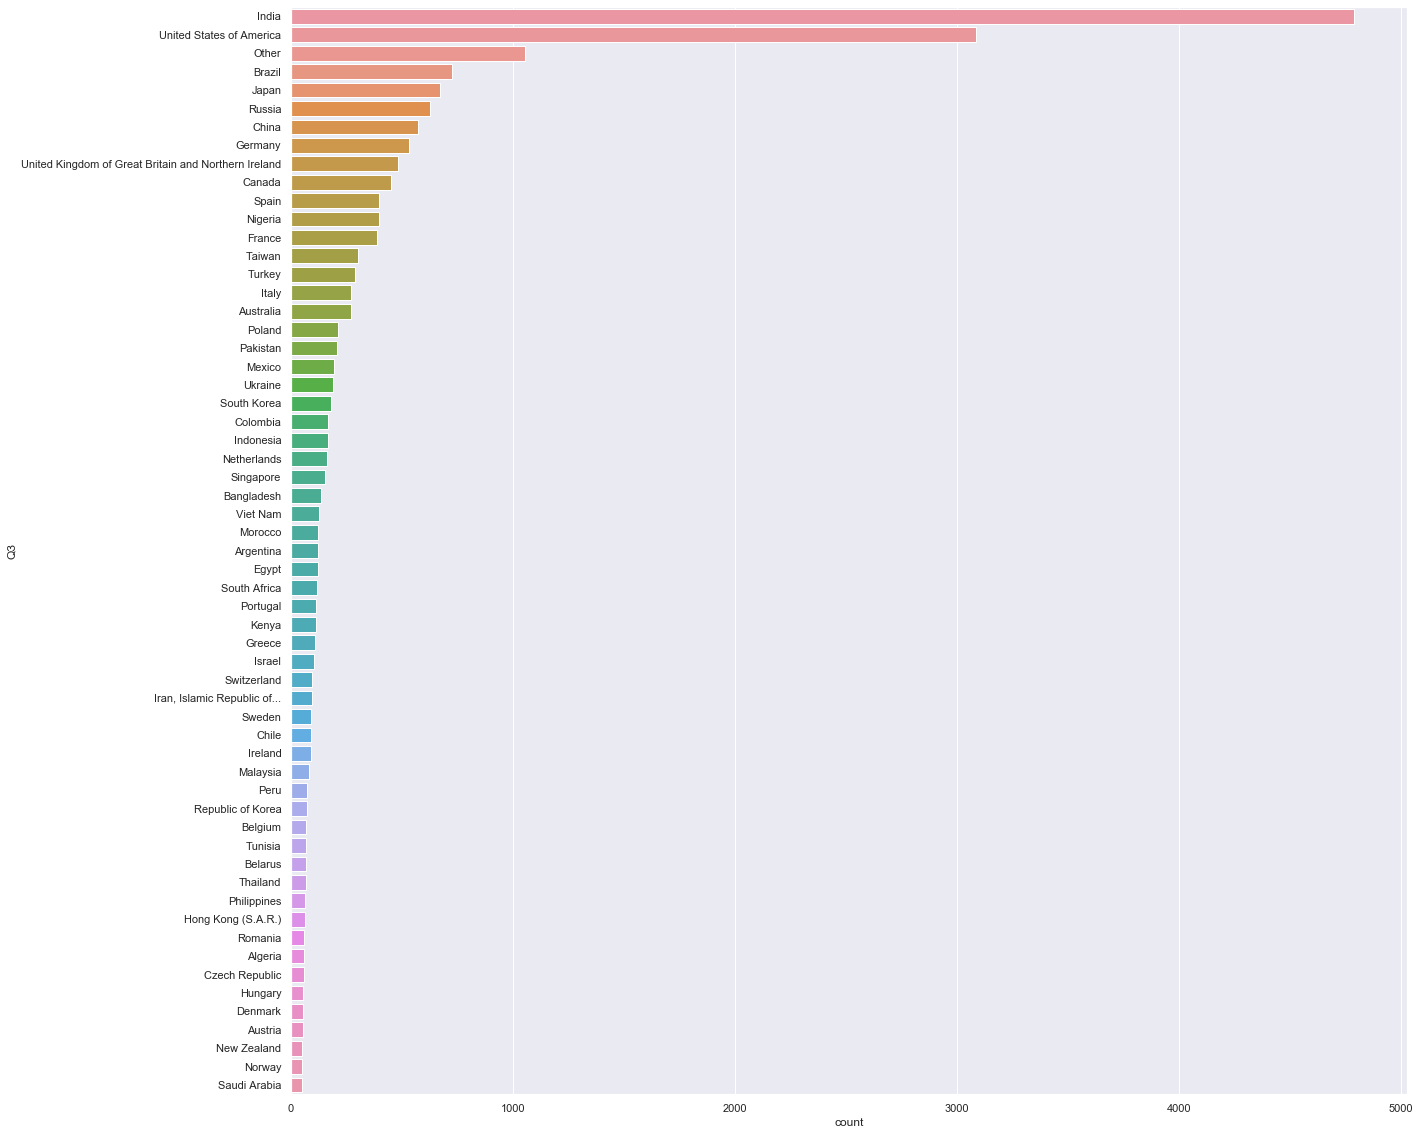

In [16]:
## 국가별로 살펴 보자 
print(df['Q3'].describe())
plt.figure(figsize=(20,20))
sns.countplot(data=df, y='Q3', order = df['Q3'].value_counts().index)   ## 정렬

##### --> 인도인과 미국인의 비중이 매우 높음, 한국은 21위에 랭크 

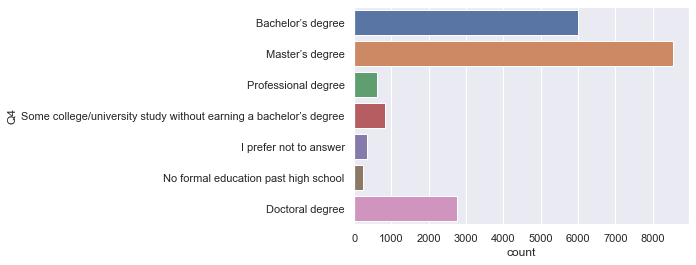

In [17]:
## Q4. 응답자들의 학력은 어느정도 수준인가? 
sns.countplot(data=df, y='Q4')

##### --> 석사학위 소지자의 비중이 높음 

[Text(0.5, 1.0, 'Korea')]

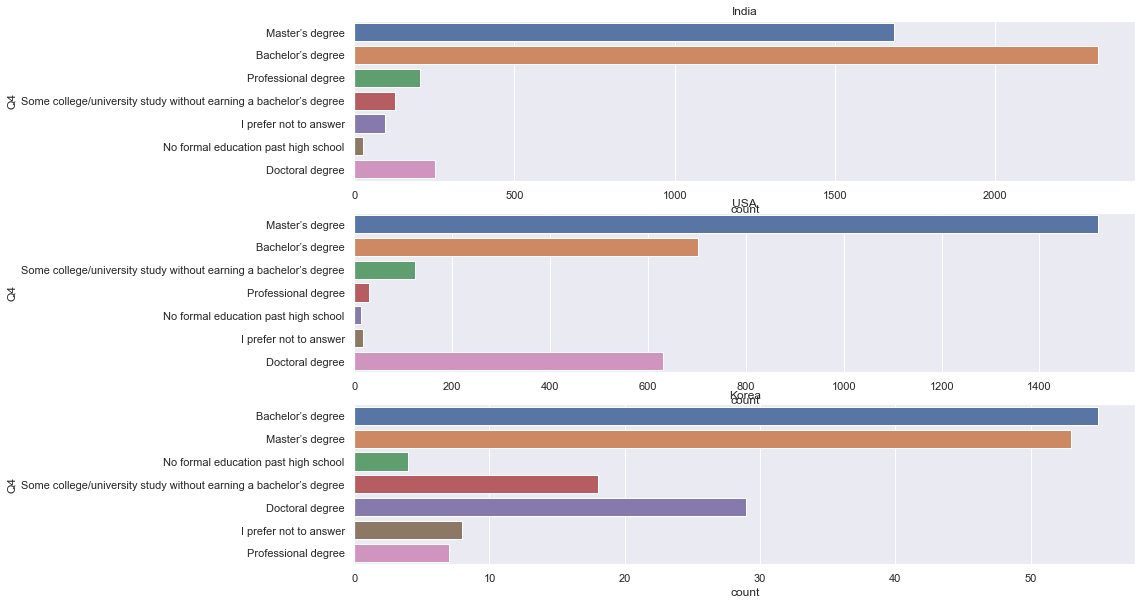

In [18]:
## 인도와 미국, 한국의 학력수준을 비교해 보자 
df_india = df[df['Q3']=='India']
df_usa = df[df['Q3']=='United States of America']
df_korea = df[df['Q3']=='South Korea']

figure,(ax1,ax2, ax3) = plt.subplots(nrows=3)
figure.set_size_inches(14,10)

sns.countplot(data=df_india, y='Q4', ax=ax1)
sns.countplot(data=df_usa, y='Q4', ax=ax2)
sns.countplot(data=df_korea, y='Q4', ax=ax3)
ax1.set(title = 'India')
ax2.set(title = 'USA')
ax3.set(title = 'Korea')

##### --> 인도는 학사가 가장 많았던데 비해, 한국과 미국은 상대적으로 미국은 석/박사 비중이 높음

[Text(0.5, 1.0, 'Korea')]

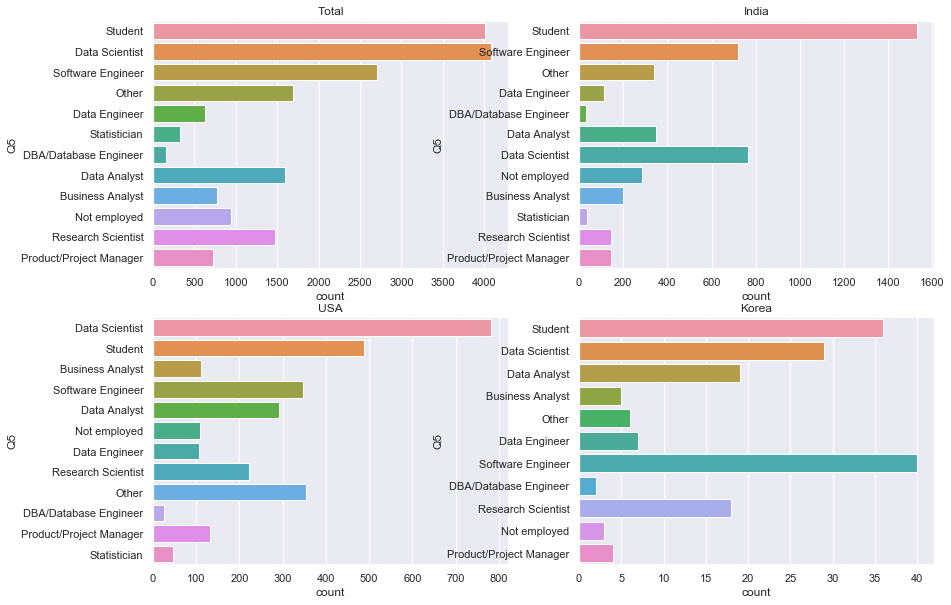

In [19]:
## Q5. 응답자들의 직업을 알아보자 ~ 국가별 비교 포함 
figure,((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)

sns.countplot(data=df, y='Q5', ax=ax1)
sns.countplot(data=df_india, y='Q5', ax=ax2)
sns.countplot(data=df_usa, y='Q5', ax=ax3)
sns.countplot(data=df_korea, y='Q5', ax=ax4)
ax1.set(title = 'Total')
ax2.set(title = 'India')
ax3.set(title = 'USA')
ax4.set(title = 'Korea')

##### --> 전반적으로 데이터과학자와 학생, 소프트웨어 엔지니어 비중이 높음 
##### --> 인도는 학생, 미국은 데이터과학자 비중이 높은데 비해, 한국은 개발자(SW 엔지니어) 비중이 두드러지게 높음 

count       182
unique       10
top       25-29
freq         57
Name: Q1, dtype: object


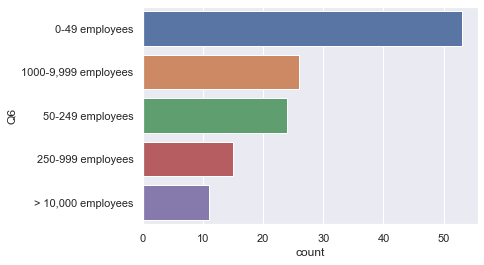

In [20]:
#Q6. 한국의 경우 응답자들이 소속된 기업의 규모는 대체로 어떠한가? 
print(df_korea['Q1'].describe())
sns.countplot(data=df_korea, y='Q6', order=df_korea['Q6'].value_counts().index)

[Text(0.5, 1.0, 'Software Engineer')]

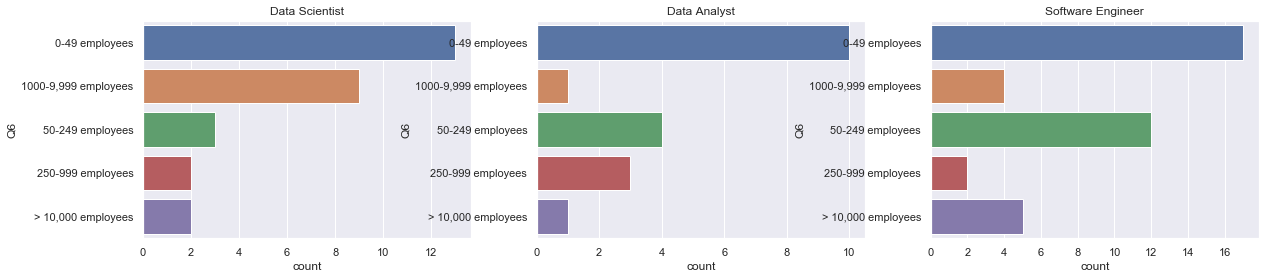

In [21]:
df_korea_DS = df_korea[df_korea['Q5']=='Data Scientist']
df_korea_DA = df_korea[df_korea['Q5']=='Data Analyst']
df_korea_SE = df_korea[df_korea['Q5']=='Software Engineer']

figure,(ax1,ax2, ax3) = plt.subplots(ncols=3)
figure.set_size_inches(20,4)
sns.countplot(data=df_korea_DS, y='Q6', order=df_korea['Q6'].value_counts().index, ax=ax1)
sns.countplot(data=df_korea_DA, y='Q6', order=df_korea['Q6'].value_counts().index, ax=ax2)
sns.countplot(data=df_korea_SE, y='Q6', order=df_korea['Q6'].value_counts().index, ax=ax3)
ax1.set(title = 'Data Scientist')
ax2.set(title = 'Data Analyst')
ax3.set(title = 'Software Engineer')

##### --> 한국 응답자는 총 182명으로, 50명 미만 중소기업에 근무하고 있는 경우가 가장 많았음 
##### --> 직군별로는 DS는 직원수 1천명 이상의 대기업에 근무하는 경우가 상대적으로 많았으나, DA 및 SE는 50~249명 규모의 중견그룹의 비중이 높았다. 

[Text(0.5, 1.0, 'Korea')]

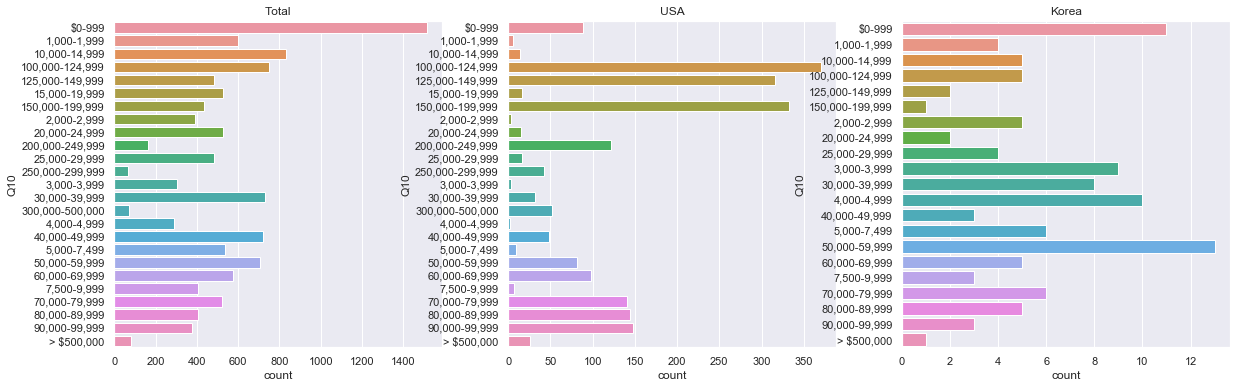

In [22]:
## Q10. 연봉수준은? (USD기준)
df = df.sort_values(by=['Q10'], axis=0) 
df_usa = df_usa.sort_values(by=['Q10'], axis=0) 
df_korea = df_korea.sort_values(by=['Q10'], axis=0) 

figure,(ax1,ax2,ax3) = plt.subplots(ncols=3)
figure.set_size_inches(20,6)

sns.countplot(data=df, y='Q10', ax=ax1)
sns.countplot(data=df_usa, y='Q10', ax=ax2)
sns.countplot(data=df_korea, y='Q10', ax=ax3)
ax1.set(title = 'Total')
ax2.set(title = 'USA')
ax3.set(title = 'Korea')

[Text(0.5, 1.0, 'SW Engineer in Korea')]

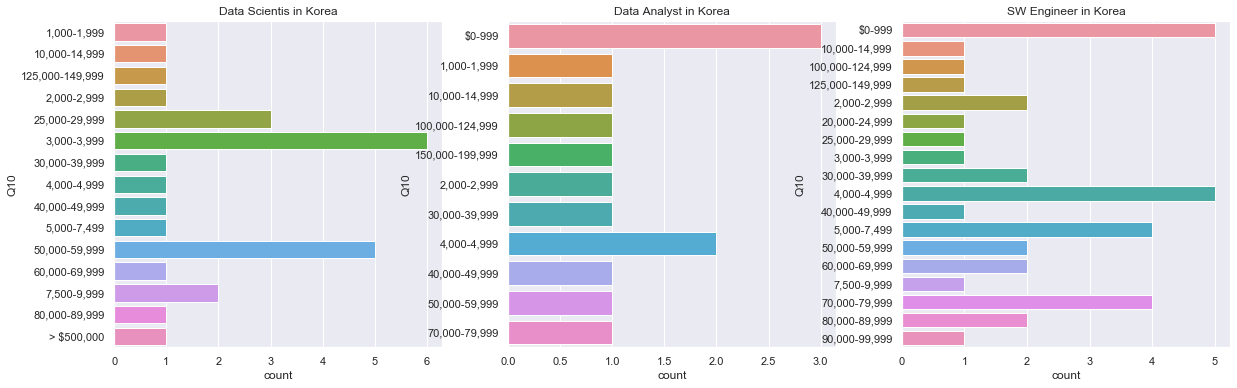

In [23]:
df_korea_DS = df_korea_DS.sort_values(by=['Q10'], axis=0) 
df_korea_DA = df_korea_DA.sort_values(by=['Q10'], axis=0) 
df_korea_SE = df_korea_SE.sort_values(by=['Q10'], axis=0) 

figure,(ax1,ax2,ax3) = plt.subplots(ncols=3)
figure.set_size_inches(20,6)

sns.countplot(data=df_korea_DS, y='Q10', ax=ax1)
sns.countplot(data=df_korea_DA, y='Q10', ax=ax2)
sns.countplot(data=df_korea_SE, y='Q10', ax=ax3)
ax1.set(title = 'Data Scientis in Korea')
ax2.set(title = 'Data Analyst in Korea')
ax3.set(title = 'SW Engineer in Korea')

##### --> 미국은 10 ~ 20만 달러 수준의 연봉이 가장 많다. 반면 한국은 5 ~ 6만불 수준이 가장 많다. 
##### --> 한국의 경우 SW 엔지니어의 연봉이 DS, DA보다 높아 보이나 샘플수가 적어 의미를 부여하기는 어렵다. 

In [24]:
#### 복수응답 처리를 위한 데이터 전처리 
df_multi = df.copy()
df_multi_mod = df_multi.drop(df_multi.index[0]).reset_index(drop=True)
df_multi_mod.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,460,22-24,Male,-1,China,Some college/university study without earning ...,Data Analyst,-1,50-249 employees,3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,31219,45-49,Male,-1,India,Master’s degree,Product/Project Manager,-1,50-249 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,1995,22-24,Male,-1,India,Bachelor’s degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1
3,580,25-29,Male,-1,Turkey,Master’s degree,Data Scientist,-1,50-249 employees,3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,2813,22-24,Male,-1,Japan,Master’s degree,Statistician,-1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [26]:
## 분석대상 복수응답 문항의 응답값을 매핑한다. 
## ------------------------------------------------------
## Q18. 주로 사용하는 프로그래밍 언어는 무엇인가?
## Q24.주로 어떤 ML 알고리즘을 사용하는가?
## Q28. 주로 사용하는 ML package, library는 무엇인가? 
## Q29. 어떤 클라우드를 사용하고 있는가?
## Q30. 어떤 클라우드 컴퓨팅을 사용하고 있는가?
## Q31. 빅데이터 처리,분석을 위해 사용하고 있는 도구는?
## Q33. ML을 위해 사용하는 도구(제품)은 무엇인가? 
## Q34. 주로 어떤 데이터베이스를 사용하는가? 

questions_to_features = {'Q18_Part_1' : 'Python',
                         'Q18_Part_2' : 'R',
                         'Q18_Part_3' : 'SQL',
                         'Q18_Part_4' : 'C',
                         'Q18_Part_5' : 'C++',
                         'Q18_Part_6' : 'Java',
                         'Q18_Part_7' : 'Javascript',
                         'Q18_Part_8' : 'TypeScript',
                         'Q18_Part_9' : 'Bash',
                         'Q18_Part_10' : 'MATLAB',
                         'Q18_Part_11' : 'No language',
                         'Q18_Part_12' : 'Other language',

                         'Q24_Part_1' : 'Linear or Logistic Regression',
                         'Q24_Part_2' : 'Decision Trees or Random Forests',
                         'Q24_Part_3' : 'Gradient Boosting Machines',
                         'Q24_Part_4' : 'Bayesian Approaches',
                         'Q24_Part_5' : 'Evolutionary Approaches',
                         'Q24_Part_6' : 'Dense Neural Networks',
                         'Q24_Part_7' : 'Convolutional Neural Networks',
                         'Q24_Part_8' : 'Generative Adversarial Networks',
                         'Q24_Part_9' : 'Recurrent Neural Networks',
                         'Q24_Part_10' : 'Transformer Networks',
                         'Q24_Part_11' : 'No ML algorithms',
                         'Q24_Part_12' : 'Other ML algorithms',
                         
                         'Q28_Part_1' : 'Scikit-learn', 
                         'Q28_Part_2': 'TensorFlow',
                         'Q28_Part_3': 'Keras' ,
                         'Q28_Part_4': 'RandomForest',
                         'Q28_Part_5': 'Xgboost',
                         'Q28_Part_6': 'PyTorch',
                         'Q28_Part_7': 'Caret',
                         'Q28_Part_8': 'LightGBM',
                         'Q28_Part_9': 'Spark MLib',
                         'Q28_Part_10': 'Fast.ai',  

                        'Q29_Part_1': 'Google Cloud Platform (GCP)', 
                        'Q29_Part_2': 'Amazon Web Services (AWS)' , 
                        'Q29_Part_3': 'Microsoft Azure' , 
                        'Q29_Part_4': 'IBM Cloud' , 
                        'Q29_Part_5': 'Alibaba Cloud',  
                        'Q29_Part_6': 'Salesforce Cloud', 
                        'Q29_Part_7': 'Oracle Cloud' , 
                        'Q29_Part_8': 'SAP Cloud' , 
                        'Q29_Part_9': 'VMware Cloud', 
                        'Q29_Part_10': 'Red Hat Cloud' ,
                        
                        'Q30_Part_1':'AWS Elastic Compute Cloud (EC2)',
                        'Q30_Part_2':'Google Compute Engine (GCE)',
                        'Q30_Part_3':'AWS Lambda',
                        'Q30_Part_4':'Azure Virtual Machines',
                        'Q30_Part_5':'Google App Engine',
                        'Q30_Part_6':'Google Cloud Functions',
                        'Q30_Part_7':'AWS Elastic Beanstalk',
                        'Q30_Part_8':'Google Kubernetes Engine',
                        'Q30_Part_9':'AWS Batch',
                        'Q30_Part_10':'Azure Container Service' ,  

                        'Q31_Part_1':'Google BigQuery',
                        'Q31_Part_2':'AWS Redshift',
                        'Q31_Part_3':'Databricks',
                        'Q31_Part_4':'AWS Elastic MapReduce',
                        'Q31_Part_5':'Teradata',
                        'Q31_Part_6':'Microsoft Analysis Services',
                        'Q31_Part_7':'Google Cloud Dataflow',
                        'Q31_Part_8':'AWS Athena',
                        'Q31_Part_9':'AWS Kinesis',
                        'Q31_Part_10':'Google Cloud Pub/Sub', 

                        'Q33_Part_1':'SAS' ,
                        'Q33_Part_2':'Cloudera',
                        'Q33_Part_3':'Azure ML studio',
                        'Q33_Part_4':'Google Cloud Machine Learning Engine',
                        'Q33_Part_5': 'Google Cloud Vision', 
                        'Q33_Part_6':'Google Cloud Speech-to-Text',
                        'Q33_Part_7':'Google Cloud Natural Language',
                        'Q33_Part_8': 'RapidMiner',
                        'Q33_Part_9':'Google Cloud Translation',
                        'Q33_Part_10': 'Amazon SageMaker',  
                                                  
                         'Q34_Part_1' : 'MySQL', 
                         'Q34_Part_2' : 'PostgresSQL', 
                         'Q34_Part_3' : 'SQLite', 
                         'Q34_Part_4': 'Microsoft SQL Server',
                         'Q34_Part_5' : 'Oracle Database', 
                         'Q34_Part_6': 'Microsoft Access',  
                         'Q34_Part_7' : 'AWS Relational Database Service', 
                         'Q34_Part_8' : 'AWS DynamoDB', 
                         'Q34_Part_9' : 'Azure SQL Database', 
                         'Q34_Part_10' : 'Google Cloud SQL', 
                         'Q34_Part_11' : 'No database',
                         'Q34_Part_12' : 'Other database'}

df_multi_mod.rename(columns = questions_to_features, inplace = True)
df_multi_mod.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Microsoft SQL Server,Oracle Database,Microsoft Access,AWS Relational Database Service,AWS DynamoDB,Azure SQL Database,Google Cloud SQL,No database,Other database,Q34_OTHER_TEXT
0,460,22-24,Male,-1,China,Some college/university study without earning ...,Data Analyst,-1,50-249 employees,3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,31219,45-49,Male,-1,India,Master’s degree,Product/Project Manager,-1,50-249 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,1995,22-24,Male,-1,India,Bachelor’s degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1
3,580,25-29,Male,-1,Turkey,Master’s degree,Data Scientist,-1,50-249 employees,3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,2813,22-24,Male,-1,Japan,Master’s degree,Statistician,-1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


#### Part I. Programming Language 
##### Q18. 주로 사용하는 프로그래밍 언어는 무엇인가?
##### Q19. 초보자에게 어떤 프로그래밍 언어를 추천하는가? 

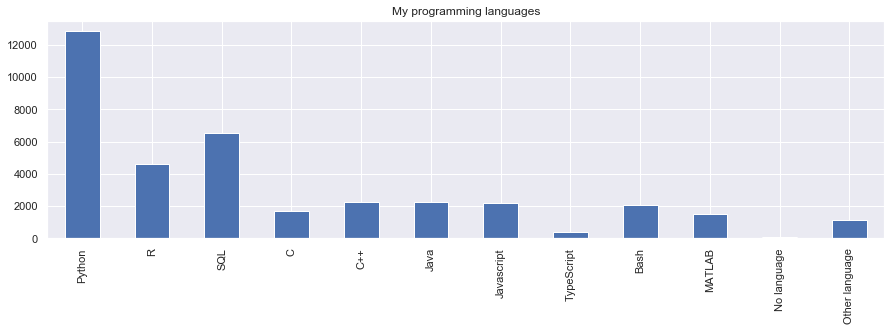

In [28]:
lang_columns = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'TypeScript', 'Bash', 'MATLAB', 'No language', 'Other language']
plt.figure(figsize=(15,4))
df_multi_mod[lang_columns].count().plot(kind='bar', title='My programming languages')

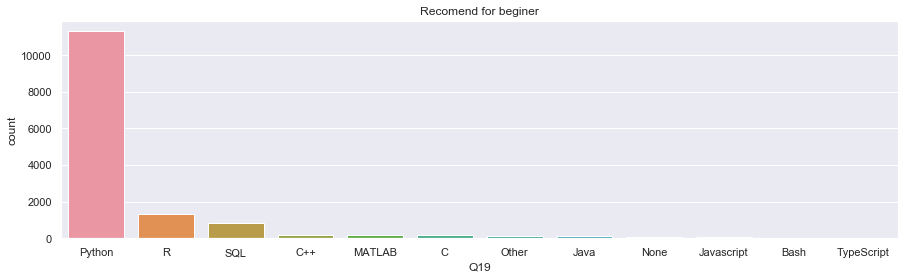

In [33]:
#### Q19는 복수응답 문항이 아니므로, 별도의 전처리가 필요 없다. 
plt.figure(figsize=(15,4))
plt.title('Recomend for beginer')
sns.countplot(data=df, x='Q19', order=df['Q19'].value_counts().index)

##### --> Python, R, SQL이 가장 많이 사용되는 언어이며, 초보자들에게 추천하는 언어는 Python이 압도적이다. 

#### Part II. Machine Learning
##### Q8. 회사에서 머신러닝을 활용하고 있는가? 
##### Q24.주로 어떤 ML 알고리즘을 사용하는가?
##### Q28. ML을 위해 주로 사용하는 패키지나 라이브러리는 무엇인가? 
##### Q33. ML을 위해 사용하는 도구(제품)은 무엇인가? 

[Text(0.5, 1.0, 'Korea')]

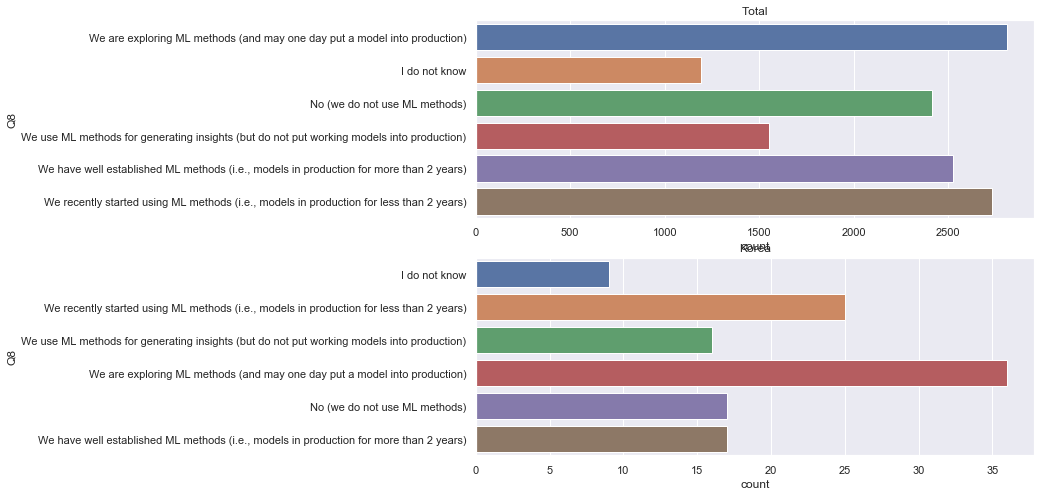

In [34]:
## Q8. 회사에서 머신러닝을 활용하고 있는가?
figure,(ax1,ax2) = plt.subplots(nrows=2)
figure.set_size_inches(10,8)

sns.countplot(data=df, y='Q8', ax=ax1)
sns.countplot(data=df_korea, y='Q8', ax=ax2)
ax1.set(title = 'Total')
ax2.set(title = 'Korea')

##### --> ML에 대해 이제 탐색중이거나, 최근 시작한 경우가 많다. 특히 한국은 아직까지 탐색 단계가 다수임. 

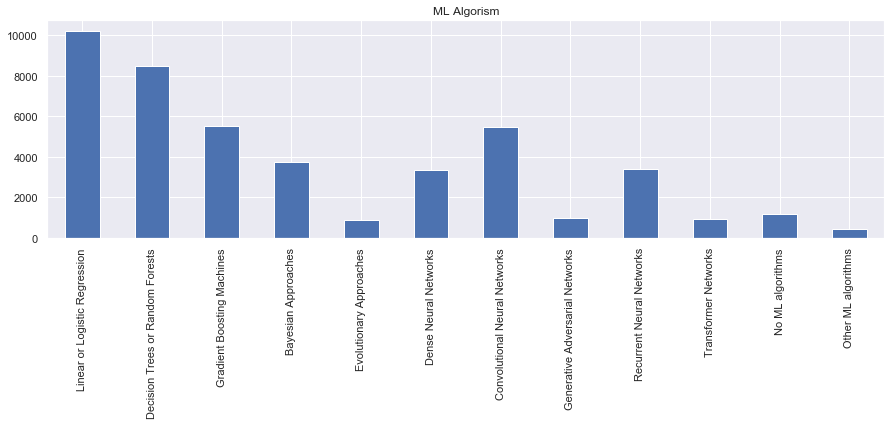

In [37]:
## Q24.주로 어떤 ML 알고리즘을 사용하는가?
alg_columns = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines', 
               'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks', 'Convolutional Neural Networks', 
               'Generative Adversarial Networks', 'Recurrent Neural Networks', 'Transformer Networks', 'No ML algorithms', 'Other ML algorithms']
plt.figure(figsize=(15,4))
df_multi_mod[alg_columns].count().plot(kind='bar', title='ML Algorism')

##### --> 많이 사용되고 있는 ML 알고리즘은 Regression, Decision Tree, Random Forest, C.Neural network 등이다. 

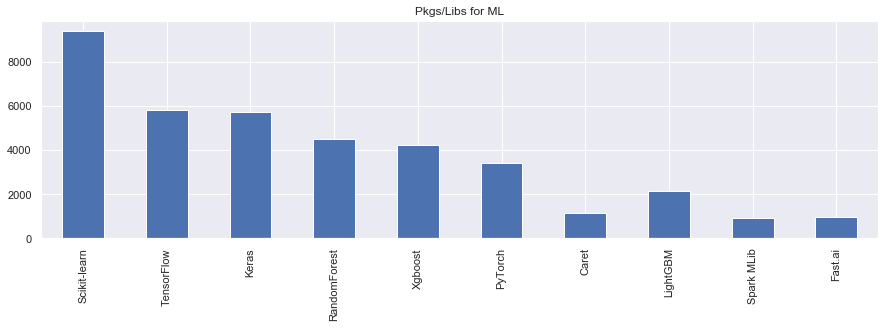

In [44]:
## Q28. ML을 위해 주로 사용하는 패키지나 라이브러리는 무엇인가? 
pl_columns = ['Scikit-learn', 'TensorFlow', 'Keras' , 'RandomForest', 'Xgboost', 'PyTorch', 'Caret','LightGBM', 'Spark MLib', 'Fast.ai' ]
plt.figure(figsize=(15,4))
df_multi_mod[pl_columns].count().plot(kind='bar', title='Pkgs/Libs for ML')

##### --> 사이킷런, 텐서플로, 케라스 등 유명한 패키지들이 주로 사용되고 있다. 

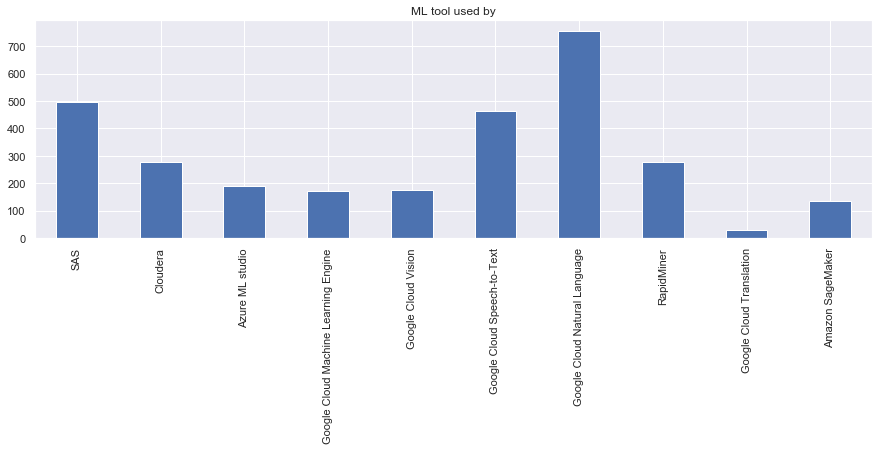

In [36]:
## Q33.ML을 위해 사용하는 도구(제품)은 무엇인가?
mltool_columns = ['SAS' , 'Cloudera', 'Azure ML studio', 'Google Cloud Machine Learning Engine', 'Google Cloud Vision', 
                  'Google Cloud Speech-to-Text', 'Google Cloud Natural Language', 'RapidMiner', 'Google Cloud Translation', 'Amazon SageMaker' ]

plt.figure(figsize=(15,4))
df_multi_mod[mltool_columns].count().plot(kind='bar', title='ML tool used by')

##### --> 구글의 제품군이 ML을 위해 많이 사용되고 있다. 

#### Part III. Big data Platform/Tool/Environment 
##### Q14. 주로 사용하는 분석도구는 무엇인가?
##### Q29. 어떤 클라우드를 사용하고 있는가?
##### Q30. 어떤 클라우드 컴퓨팅을 사용하고 있는가?
##### Q31. 빅데이터 처리,분석을 위해 사용하고 있는 도구는?
##### Q34. 주로 어떤 데이터베이스를 사용하는가? 

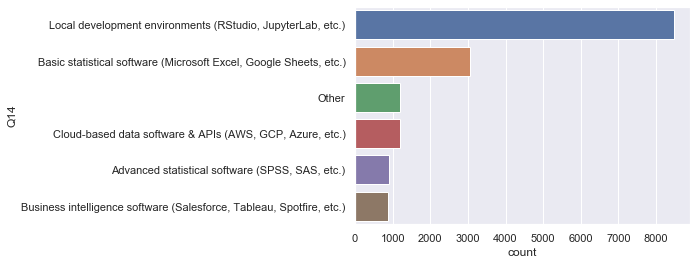

In [38]:
## Q14. 주로 사용하는 분석도구는 무엇인가?
sns.countplot(data=df, y='Q14', order=df['Q14'].value_counts().index)

##### --> 아직까지 클라우드 보다는 로컬환경에서 분석작업을 하는 경우가 많다. 

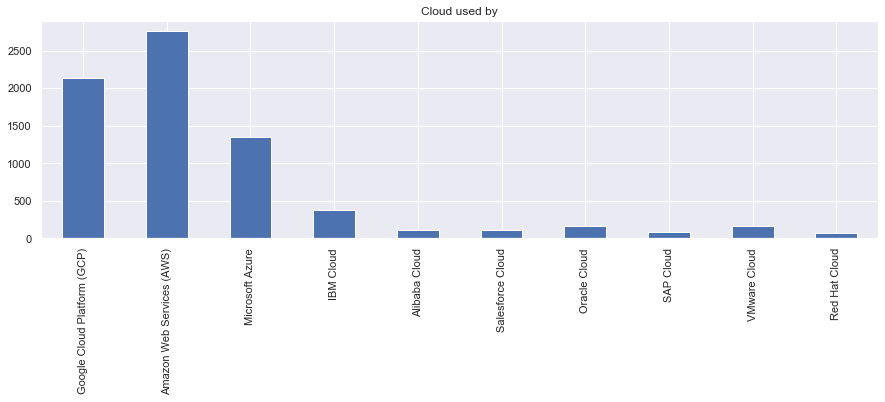

In [39]:
# Q29. 어떤 클라우드를 사용하고 있는가?
cloud_columns = ['Google Cloud Platform (GCP)' , 'Amazon Web Services (AWS)' , 'Microsoft Azure' , 'IBM Cloud' , 'Alibaba Cloud',  'Salesforce Cloud', 
                 'Oracle Cloud' , 'SAP Cloud' , 'VMware Cloud', 'Red Hat Cloud' ]

plt.figure(figsize=(15,4))
df_multi_mod[cloud_columns].count().plot(kind='bar', title='Cloud used by')

##### --> AWS > GCP > Azuer 순이며, 메이저 3사외 기타사들은 미미함 

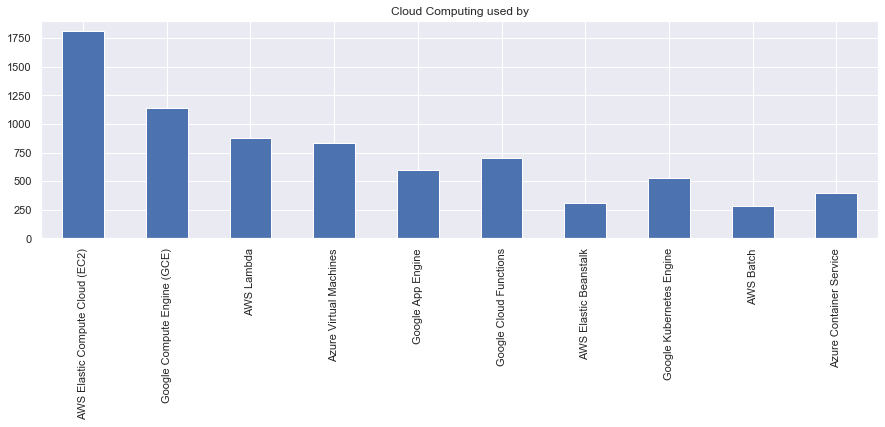

In [40]:
# Q30. 어떤 클라우드 컴퓨팅(AWS EC2 등)을 사용하고 있는가?
cp_columns = ['AWS Elastic Compute Cloud (EC2)','Google Compute Engine (GCE)','AWS Lambda','Azure Virtual Machines','Google App Engine',
              'Google Cloud Functions','AWS Elastic Beanstalk','Google Kubernetes Engine','AWS Batch','Azure Container Service']

plt.figure(figsize=(15,4))
df_multi_mod[cp_columns].count().plot(kind='bar', title='Cloud Computing used by')

##### --> AWS와 Google의 서비스들이 강세임 

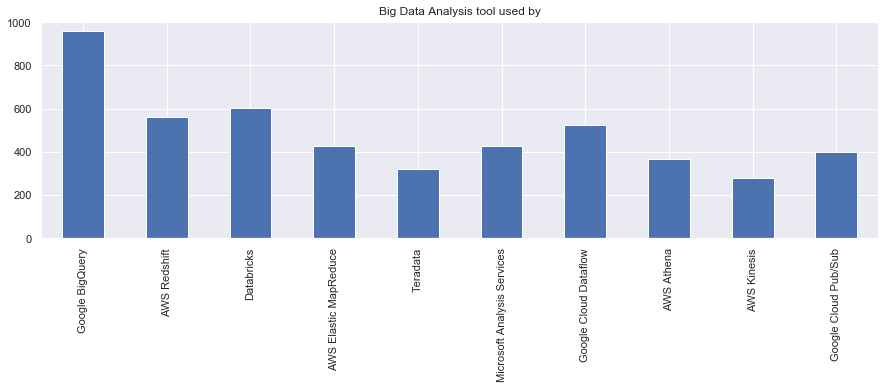

In [42]:
# Q31. 빅데이터 처리,분석을 위해 어떤 도구/서비스를 사용하고 있는가? 
cp_columns = ['Google BigQuery','AWS Redshift','Databricks','AWS Elastic MapReduce','Teradata','Microsoft Analysis Services',
              'Google Cloud Dataflow','AWS Athena','AWS Kinesis','Google Cloud Pub/Sub']

plt.figure(figsize=(15,4))
df_multi_mod[cp_columns].count().plot(kind='bar', title='Big Data Analysis tool used by')

##### --> 대용량 데이터 처리&분석에는 Google Bigquery가 강세

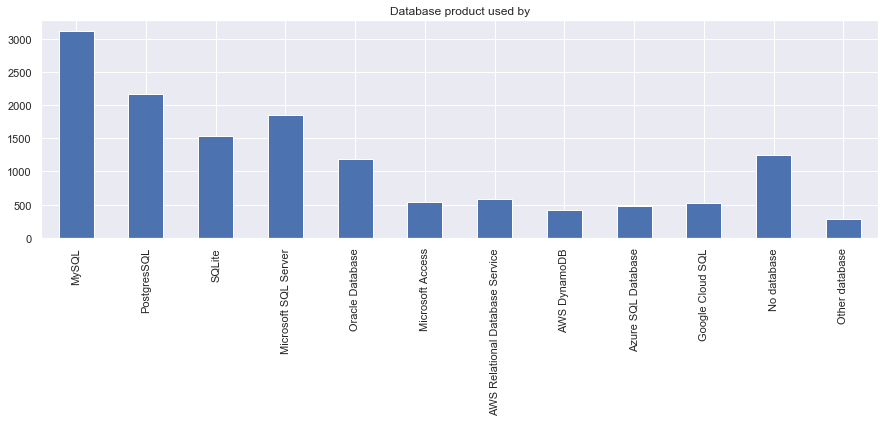

In [43]:
# Q34. 주로 어떤 데이터베이스를 사용하는가? 
database_columns = ['MySQL','PostgresSQL','SQLite','Microsoft SQL Server','Oracle Database','Microsoft Access','AWS Relational Database Service',
                    'AWS DynamoDB','Azure SQL Database','Google Cloud SQL','No database','Other database']
plt.figure(figsize=(15,4))
df_multi_mod[database_columns].count().plot(kind='bar', title='Database product used by')

##### --> DB 영역에서는 전통적인 MySQL, Postgre, MS SQL, Oracle이 여전히 대세이다. 